# The Deutsch-Jozsa Algorithm and how to run in real device

## Deutsch-Jozsa

The Deutsch-Jozsa Algorithm proposed by David Deutsch and Richard Jozsa in 1992,has limited practical use but is one of the first examples of a quantum algorithm, displaying the advantages of working in the quantum paradigm.

This algorithm is deterministic and verifies if a function $f:\{0,1\}^n\rightarrow \{0,1\}$ is balanced or constant.

- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half of the input value and 1 for the other half


### Example
(with $n = 3$)

**Constant function**

|input|output|
|-|-|
|000|0|
|001|0|
|010|0|
|011|0|
|100|0|
|101|0|
|110|0|
|111|0|

**Balanced function**

|input|output|
|-|-|
|000|0|
|001|1|
|010|1|
|011|0|
|100|1|
|101|0|
|110|0|
|111|1|


**Balanced function worst case scenario**

|input|output|
|-|-|
|000|0|
|001|0|
|010|0|
|011|0|
|100|1|
|101|1|
|110|1|
|111|1|

We call these functions the **oracle**.

In the example, the oracle takes an input with 3 bits and outputs the unknown value.

To get the answer to this problem in a classical world we may have the worst case scenario which includes testing the function $2^{(n-1)} + 1$ times.

If the evaluations are sequential the worst case scenario needs $2^{(3-1)}+1=5$ tests.

However, **the quantum case only needs one function evaluation**.

### Implementation

Implement the balance function of the previous example.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import *

**1** Initialize the first  $n$  qubits with state  $0$  and a final qubit with state $1$.

$$\lvert \psi_0 \rangle = \lvert 0\rangle^{\oplus n} \lvert 1 \rangle$$

In [43]:
# Create a quantum circuit with n+1 qubits and n bits
n= 3

qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

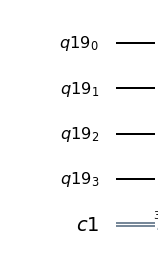

In [44]:

qc.draw(output='mpl')

**2** Apply a Hadamard gate to each qubit $H^{\oplus n+1}$.

$$\sum_x \frac{\lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle)}{\sqrt{2}} \right]$$

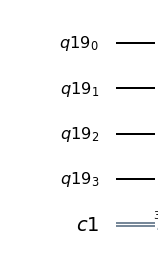

In [45]:

qc.draw(output='mpl')

**3** Apply the Oracle $f(x)$. 

This maps the state $\lvert x \rangle \lvert y \rangle $ to $ \lvert x \rangle \lvert y \rangle \oplus f(x)\rangle$

$$ \frac{1}{\sqrt{2^{n+1}}} \sum_x \lvert x \rangle (\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle )$$

For each $x$, $f(x)$ is either $1$ or $0$ allowing us to rewrite the previews equation as:

$$ \sum_{x} \frac{(-1)^{f(x)} \lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle - \lvert 1 \rangle)}{\sqrt{2}} \right] $$

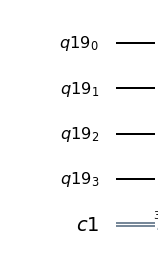

In [46]:


qc.draw(output='mpl')

**4** Apply a Hadamard gate to the first $n$ qubits.

$$\sum_{x,y} \frac{(-1)^{f(x) \oplus (x\cdot y)} \lvert x \rangle}{2^n} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle )}{\sqrt{2}} \right]$$

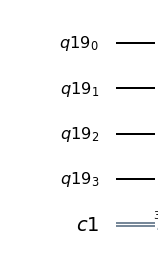

In [47]:

    
qc.draw(output='mpl')

**5** Measure the first $n$ qubits. The probability of measuring $\lvert 0\rangle \oplus n$:

$$ \left| \sum_x \frac{(-1)^{f(x)}}{2^n} \right| ^2 $$

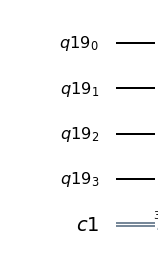

In [48]:

    
qc.draw(output='mpl')

Let’s start with some intuition of how this algorithm works, to do that we are going to recall one of the famous problems that classical physics could not explain,the double slit experiment.
This experiment makes clear that some particles (like photons, protons or electrons) have a wave-like behavior, creating interference patterns.
In other words, the probability of a particle hitting a specific detector depends on the type of interference in the path. If the interference is destructive the probability is small, and if it is constructive there is a high probability of hitting the detector.

The Deutsch-Jozsa algorithm sees the constant function as the one that has constructive interference and the balanced one as the one with destructive interference.
Therefore, we can expect to see a probability close to $100\%$ when the function is constant and a different result from the balanced function.


* When $f$ is constant the probability is $1$ (constructive interference);
* When $f$ is balanced the probability is $0$ (destructive interference).

In other words

*  When $f$ is constant the measure will be $\lvert 0 \rangle^{\otimes n}$;
* When $f$ is balanced the measure will yield any other state.

In [8]:
backend = Aer.get_backend("qasm_simulator")

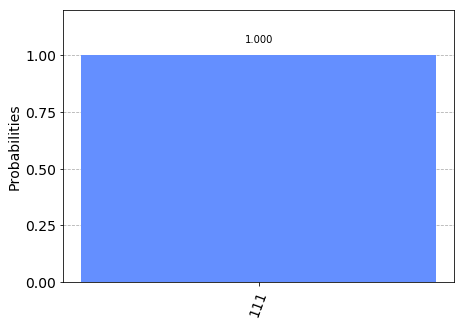

In [9]:
shots=1024
result = execute(qc, backend, shots=shots).result()
counts_sim = result.get_counts(qc)
plot_histogram(counts_sim)

## IBM Q Provider

In [10]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [11]:
backends_list =provider.backends( simulator=False, open_pulse=False)

In [12]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [14]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_paris                   ibmq_cambridge              ibmq_rochester
----------                   --------------              --------------
Num. Qubits:  27             Num. Qubits:  28            Num. Qubits:  53
Pending Jobs: 20             Pending Jobs: 0             Pending Jobs: 43
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational:  True          Operational:  True
Avg. T1:      79.1           Avg. T1:      86.3          Avg. T1:      54.5
Avg. T2:      78.8           Avg. T2:      52.9          Avg. T2:      59.0



ibmq_johannesburg            ibmq_valencia                ibmq_rome
-----------------            -------------                ---------
Num. Qubits:  20             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 4              Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operation

**Fisrt Experience**

In [72]:
from qiskit.providers.ibmq import least_busy

backend_device = least_busy(backends_list)
print("Running on current least busy device: ", backend_device)

Running on current least busy device:  ibmq_essex


In [74]:
backend_monitor(backend_device)

ibmq_essex
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 0
    backend_version: 1.0.1
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    max_shots: 8192
    credits_required: True
    n_registers: 1
    allow_object_storage: True
    quantum_volume: 8
    open_pulse: False
    meas_map: [[0, 1, 2, 3, 4]]
    memory: True
    max_experiments: 75
    online_date: 2019-09-13T04:00:00Z
    allow_q_object: True
    url: None
    sample_name: Giraffe
    allow_q_circuit: False
    conditional: False
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    backend_name: ibmq_essex
    description: 5 qubit device Essex

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.4998 GHz / 122.681 µs / 140.55406 µs / 0 / 0.00042 / 0.00084 / 0.03833
    Q1 / 4.69464 GHz / 1

**Second Experience**

In [17]:
backend_device = provider.get_backend('ibmq_16_melbourne')
print("Running on: ", backend_device)

Running on:  ibmq_16_melbourne


In [30]:
# See backend information
backend_device

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
backend_monitor(backend_device)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 15
    operational: True
    status_msg: active
    pending_jobs: 13
    backend_version: 2.1.0
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    max_experiments: 75
    coupling_map: [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]
    memory: True
    quantum_volume: None
    max_shots: 8192
    sample_name: albatross
    open_pulse: False
    n_registers: 1
    allow_q_circuit: False
    credits_required: True
    allow_q_object: True
    url: None
    description: 15 qubit device
    conditional: False
    allow_object_storage: True
    backend_name: ibmq_16_melbourne
    online_date: 2018

In [35]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [20]:
#job_DJ_r = execute(qc, backend_device, shots=shots)

jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 5ec50bd4ec3008001a041458


In [21]:
#ibmq_essex
#job_get=backend_device.retrieve_job("5ec319b0e9fa9900132bb5bb")

#ibmq_16_melbourne
job_get=backend_device.retrieve_job("5ec50bd4ec3008001a041458")


result_DJ_r = job_get.result()
counts_DJ_run = result_DJ_r.get_counts(qc)

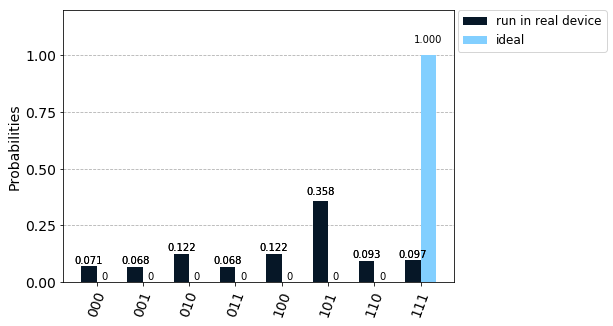

In [22]:
plot_histogram([counts_DJ_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

### Optimize

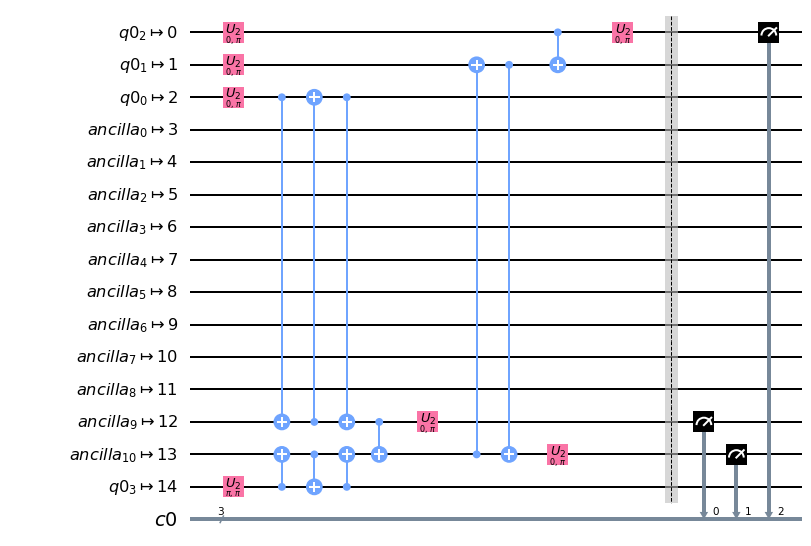

In [23]:
from qiskit.compiler import transpile

qc_t_real = transpile(qc, backend=backend_device)

qc_t_real.draw(output='mpl', scale=0.5)

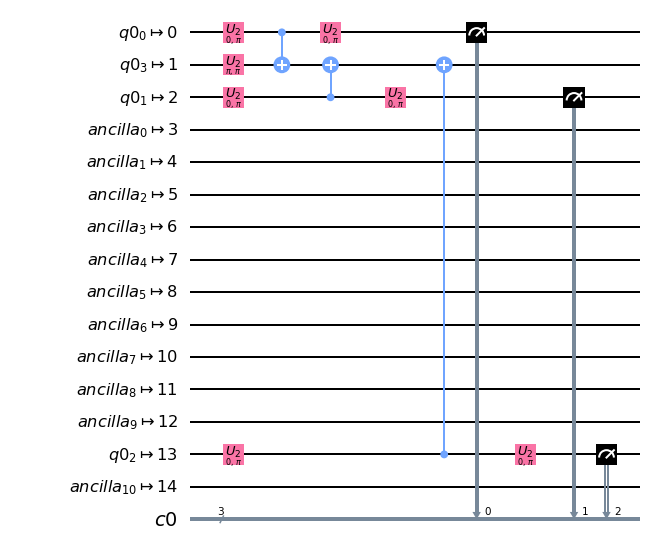

In [40]:
qc_optimized = transpile(qc, backend=backend_device, optimization_level=3)
qc_optimized.draw(output='mpl', scale=0.5)

In [25]:
qc.depth()

7

In [26]:
qc_t_real.depth()

10

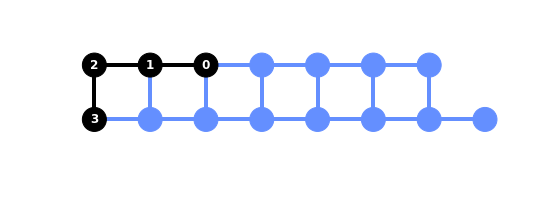

In [27]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend_device)

In [41]:
qc_optimized.depth()

6

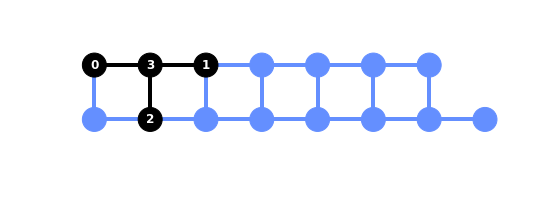

In [42]:
plot_circuit_layout(qc_optimized, backend_device)

In [31]:
#job_exp = execute(qc_optimized, backend_device, shots = shots)

# job_id allows you to retrive old jobs
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))

job_exp.result().get_counts(qc_optimized)

JOB ID: 5ec50eeb414a560012240261


{'000': 17,
 '001': 29,
 '010': 17,
 '011': 160,
 '100': 5,
 '101': 108,
 '110': 69,
 '111': 619}

In [32]:
%qiskit_disable_job_watcher

In [33]:
#ibmq_essex
#job_get_o=backend_device.retrieve_job("5ec31a846b8e0100120f67db")

#ibmq_16_melbourne o3
job_get_o=backend_device.retrieve_job("5ec50eeb414a560012240261")

result_real_o = job_get_o.result(timeout=3600, wait=5)

counts_opt = result_real_o.get_counts(qc_optimized)

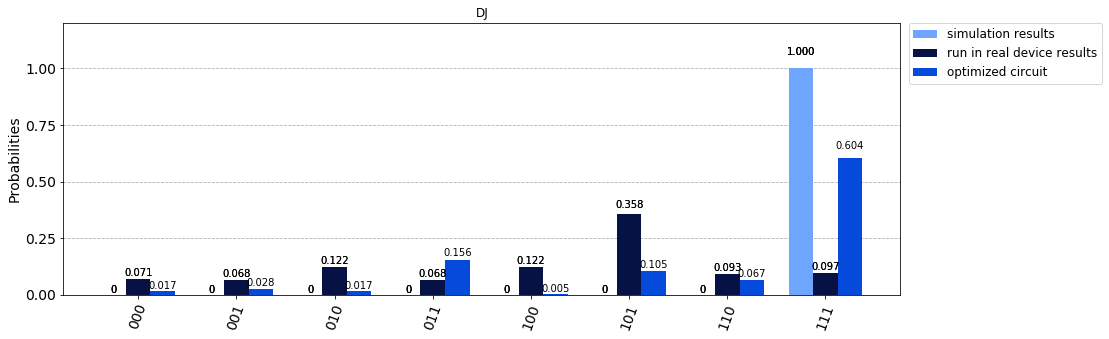

In [34]:
title = 'DJ'
legend = [ 'simulation results','run in real device results', 'optimized circuit']
color = ['#6ea6ff','#051243','#054ada']

plot_histogram([counts_sim, counts_DJ_run, counts_opt], legend = legend, title= title, color=color, figsize=(15, 5),)

**Refs**

* [Deutsch-Josza Algorithm - Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html)
* [Lesson 38 Quantum Computing, Deutsch's Problem](https://www.youtube.com/watch?v=5xsyx-aNClM)